In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('breastCancer.csv')
df.replace("?", float("NaN"), inplace=True)
df.dropna(inplace=True)

In [3]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('class',axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[127   4]
 [  7  67]]


              precision    recall  f1-score   support

           2       0.95      0.97      0.96       131
           4       0.94      0.91      0.92        74

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205



In [14]:
from IPython.display import Image  
from six import StringIO
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['clump_thickness',
 'size_uniformity',
 'shape_uniformity',
 'marginal_adhesion',
 'epithelial_size',
 'bare_nucleoli',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class']

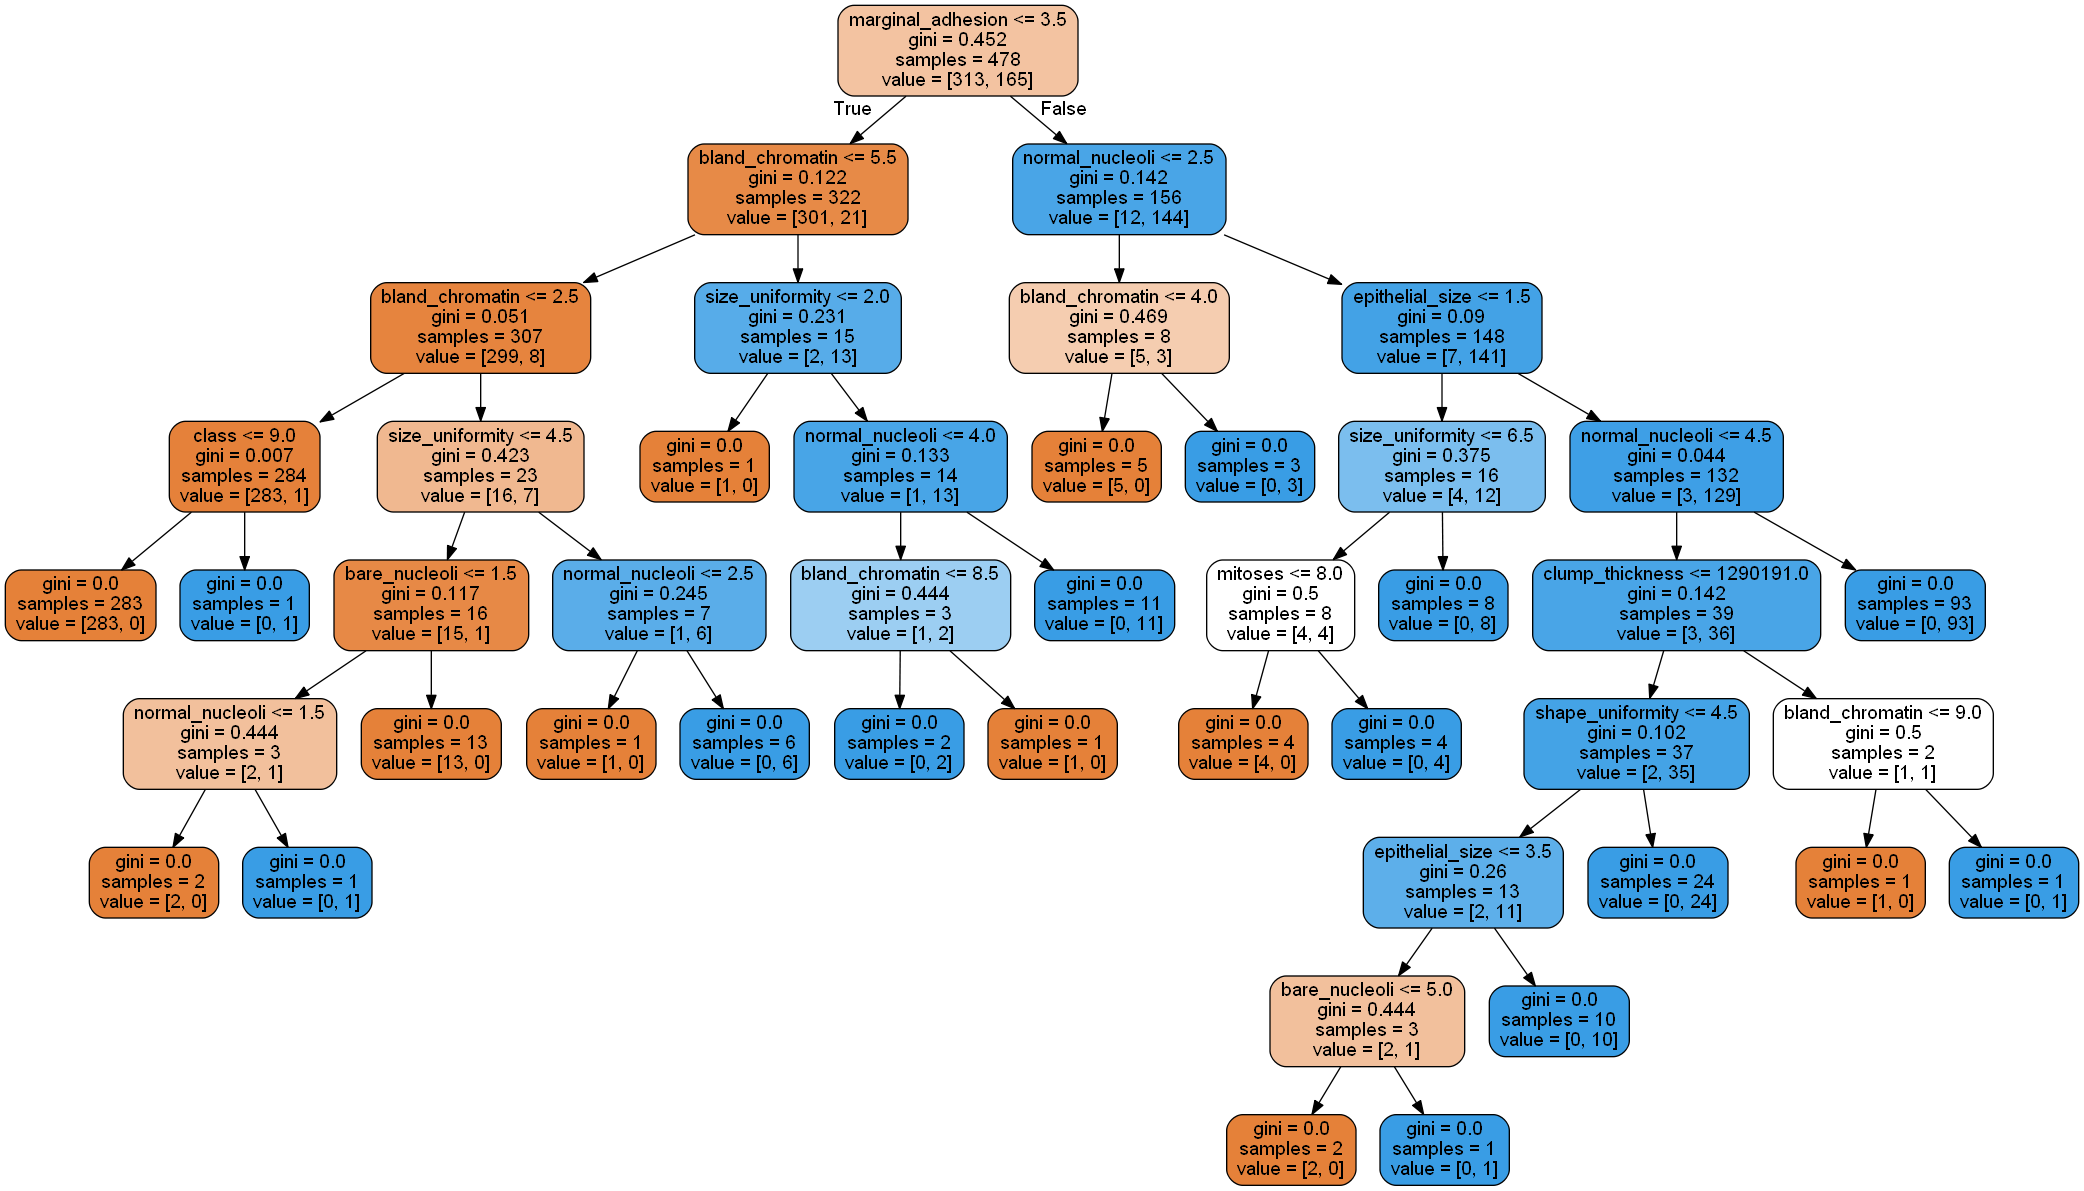

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rfc_pred = rfc.predict(X_test)

In [25]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[127   4]
 [  0  74]]


              precision    recall  f1-score   support

           2       1.00      0.97      0.98       131
           4       0.95      1.00      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



              precision    recall  f1-score   support

           2       1.00      0.97      0.98       131
           4       0.95      1.00      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

